In [54]:
#!pip install --upgrade scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')

C:\Users\ushas\AppData\Local\Temp\ipykernel_5188\3780402232.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ushas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Check out the Data**

In [55]:
df = pd.read_csv('imdb.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [56]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1999 non-null   object
 1   sentiment  1999 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [58]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [59]:
#No of a categories
len(set(df['sentiment']))        # set takes unique data only

2

In [60]:
df.groupby('sentiment').count()

,review
sentiment,
negative,994
positive,1005


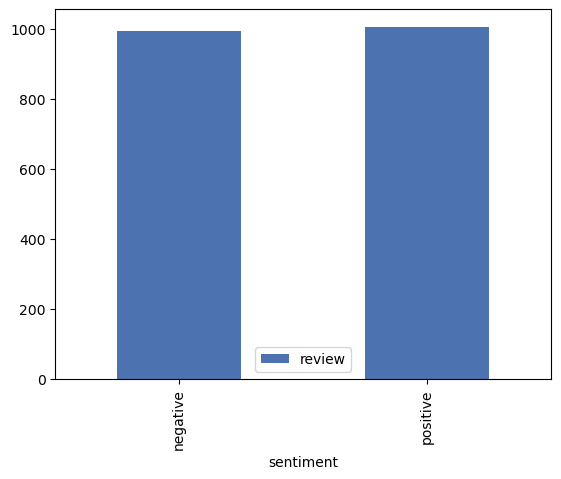

In [61]:
df.groupby('sentiment').count().plot.bar()
plt.show()

Let's make a new column to detect how long the text messages are

In [62]:
# Make new column in df named length and put length of text as its values.
df['Length'] = df['review'].apply(len)
df

,review,sentiment,Length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
1994,One of the worst movies ever made... If you ca...,negative,1189
1995,"Feeling Minnesota, directed by Steven Baigelma...",negative,701
1996,THE CELL (2000) Rating: 8/10<br /><br />The Ce...,positive,1078
1997,"This movie, despite its list of B, C, and D li...",negative,791


Let's see the percentage of ham and spam in our dataset

In [63]:
df['Length'].describe()

count    1999.000000
mean     1280.369685
std       945.423754
min        98.000000
25%       697.000000
50%       951.000000
75%      1572.500000
max      8180.000000
Name: Length, dtype: float64

One of the text has 501 characters, let's use masking to find this message:

# **Text Cleaning**

Let’s clean the text for the messages in our dataset with NLP.

In [64]:
import string
from nltk.corpus import stopwords

In [65]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ushas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's create the function to remove all punctuation, remove all stopwords and returns a list of the cleaned text

In [67]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Vectorization**

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
# text to numerical value
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['review'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000002C0F48CF100>)

In [73]:
bow_transformer.vocabulary_

{'One': 8542,
 'reviewers': 28787,
 'mentioned': 24508,
 'watching': 33910,
 '1': 7,
 'Oz': 8626,
 'episode': 19063,
 'youll': 34538,
 'hooked': 21909,
 'right': 28870,
 'exactly': 19245,
 'happened': 21397,
 'mebr': 24419,
 'br': 14935,
 'first': 20009,
 'thing': 32196,
 'struck': 31298,
 'brutality': 15091,
 'unflinching': 33131,
 'scenes': 29320,
 'violence': 33663,
 'set': 29738,
 'word': 34332,
 'GO': 4643,
 'Trust': 11719,
 'show': 29967,
 'faint': 19580,
 'hearted': 21557,
 'timid': 32381,
 'pulls': 27751,
 'punches': 27764,
 'regards': 28320,
 'drugs': 18493,
 'sex': 29766,
 'hardcore': 21424,
 'classic': 15952,
 'use': 33436,
 'wordbr': 34333,
 'called': 15274,
 'OZ': 8472,
 'nickname': 25420,
 'given': 20820,
 'Oswald': 8592,
 'Maximum': 7564,
 'Security': 10313,
 'State': 10915,
 'Penitentary': 8857,
 'focuses': 20204,
 'mainly': 24137,
 'Emerald': 3953,
 'City': 2669,
 'experimental': 19396,
 'section': 29511,
 'prison': 27468,
 'cells': 15548,
 'glass': 20838,
 'fronts': 2

Print total number of vocab words

In [74]:
print(len(bow_transformer.vocabulary_))

34618


Now let's transform the entire DataFrame of messages and create sparse matrix

In [75]:
# transform to matrix
messages_bow = bow_transformer.transform(df['review'])
messages_bow

<1999x34618 sparse matrix of type '<class 'numpy.int64'>'
	with 200485 stored elements in Compressed Sparse Row format>

In [36]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (1999, 34618)


# **TF-IDF**

Now let's compute term weighting and do normalisation with TF-IDF

In [37]:
# greater nmerical value lai small value ma lagna
# normalize
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

  (0, 34538)	0.050008103579622966
  (0, 34407)	0.05183839802167212
  (0, 34405)	0.025635748285709244
  (0, 34333)	0.09022429998315386
  (0, 34332)	0.05088846487383513
  (0, 34140)	0.19020103681250644
  (0, 34003)	0.029064444855208448
  (0, 33910)	0.034881598374972254
  (0, 33903)	0.04375213614364617
  (0, 33663)	0.2047873870178759
  (0, 33625)	0.09510051840625322
  (0, 33436)	0.044623984042666806
  (0, 33131)	0.09022429998315386
  (0, 32989)	0.07701213110667014
  (0, 32851)	0.05399813626167675
  (0, 32526)	0.06138664941332214
  (0, 32381)	0.09022429998315386
  (0, 32196)	0.03588786317920153
  (0, 31913)	0.06294057998077135
  (0, 31662)	0.06802595557800367
  (0, 31298)	0.14517957342695578
  (0, 31239)	0.06379996223018644
  (0, 30985)	0.08676456795286887
  (0, 30536)	0.06936358113492513
  (0, 30200)	0.0686761806532858
  :	:
  (1998, 25020)	0.09507897520295504
  (1998, 24769)	0.15561504969291226
  (1998, 24504)	0.18573084818026092
  (1998, 23990)	0.12689745575047467
  (1998, 23690)	0.0907

In [38]:
print(tfidf4.shape)

(1999, 34618)


In [39]:
# from sklearn.svm import SVC
# from datetime import datetime
# start_time = datetime.now()

# model = SVC()
# model.fit(x_train,y_train)

# end_time = datetime.now()
# process_time = round(end_time-start_time,2)
# print("Fitting SVC took {} seconds".format(process_time))

In [76]:
df.to_csv('cleaned3_imdb.csv')

**Train Test Split**

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2,shuffle=True)



**Creating a Data Pipeline**

Let's run our model again and then predict the test set. We will create and use a pipeline for this purpose

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM       support vector classifier
])

In [45]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [47]:
predictions = pipeline.predict(X_test)
predictions

array(['negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negati

In [79]:
X_test[1112]

'I just watched this movie on Bravo! and it was absolutely horrible. It has the plot of a Shannon Tweed movie without the nudity. The premise was interesting enough, a winning lottery ticket in a secluded area and people who have reasons why they want the money. The characters were trite as were the observations on human nature and greed.<br /><br />For a movie called Class Warfare it had very little to do with class differences other than the first 20 minutes and the predictable ending. This movie could have done a lot better if there had been more characters with motivations to get the ticket and was a "who done it?"<br /><br />The acting wasn\'t fantastic but it\'s hard to seem believable with such a terrible script. Lindsey McKeon is very cute and I\'d like to see what she could do in a better production with a better script. She\'s probably the only reason why I sat through the whole movie.<br /><br />'

In [48]:
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "     Actual :", y_test.values[i])


Predicted: negative      Actual : negative
Predicted: negative      Actual : negative
Predicted: positive      Actual : positive
Predicted: positive      Actual : positive
Predicted: negative      Actual : positive
Predicted: negative      Actual : negative
Predicted: positive      Actual : positive
Predicted: positive      Actual : positive
Predicted: negative      Actual : negative
Predicted: negative      Actual : negative
Predicted: positive      Actual : negative
Predicted: positive      Actual : positive
Predicted: negative      Actual : negative
Predicted: positive      Actual : positive
Predicted: negative      Actual : negative
Predicted: positive      Actual : positive
Predicted: negative      Actual : negative
Predicted: negative      Actual : negative
Predicted: positive      Actual : positive
Predicted: negative      Actual : positive
Predicted: positive      Actual : positive
Predicted: positive      Actual : positive
Predicted: positive      Actual : positive
Predicted: 

In [49]:
from sklearn.metrics import accuracy_score

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
accuracy = accuracy_score(y_test,predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.50%


In [50]:
from sklearn.metrics import classification_report

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
report = classification_report(y_test, predictions)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.85      0.84       197
    positive       0.85      0.82      0.83       203

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.83      0.83       400



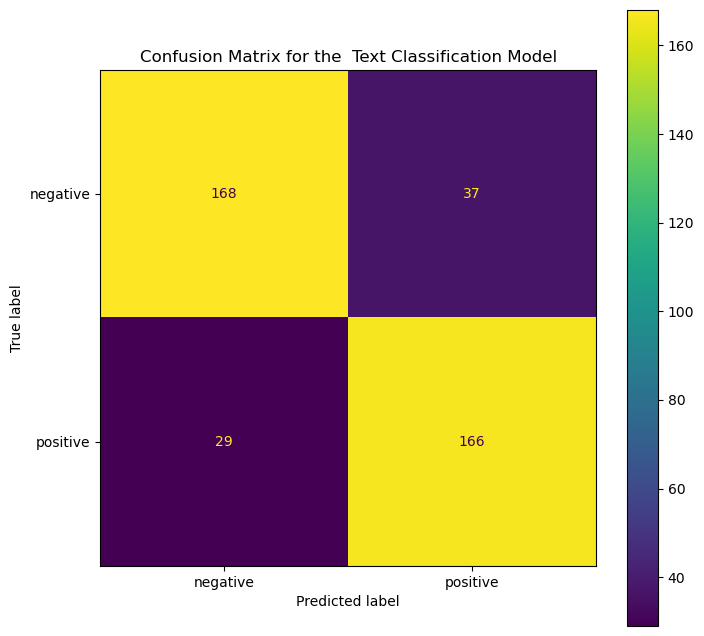

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(pipeline.predict(X_test),y_test)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['negative','positive']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);